In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [208]:
train = pd.read_csv('train_ctrUa4K.csv')
# test = pd.read_csv('test_lAUu6dG.csv')

In [209]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [210]:
test.head()

NameError: ignored

In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.info()

In [212]:
train.shape

(614, 13)

In [213]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [214]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [215]:
Gen_Lstat = pd.crosstab(train.Gender,train.Loan_Status)

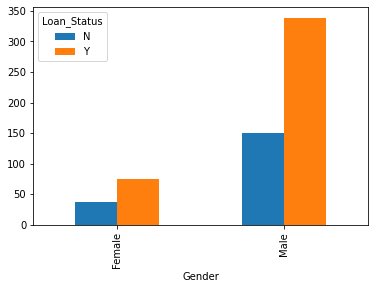

In [216]:
Gen_Lstat.plot(kind='bar')

In [217]:
train['Gender'].mode()

0    Male
dtype: object

In [218]:
Gen_Edu = pd.crosstab(train.Gender,train.Education)

In [219]:
Gen_Edu

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,376,113


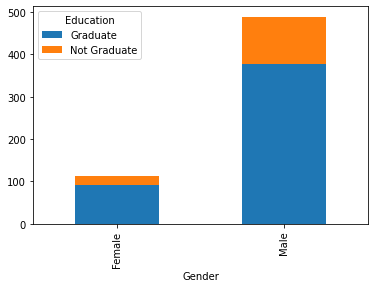

In [220]:
Gen_Edu.plot.bar(stacked=True)

In [221]:
Gen_SEmp = pd.crosstab(train.Gender,train.Self_Employed)

In [222]:
Gen_SEmp

Self_Employed,No,Yes
Gender,,
Female,89,15
Male,402,63


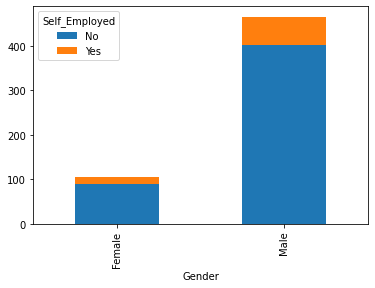

In [223]:
Gen_SEmp.plot.bar(stacked=True)

In [224]:
train['Gender'].fillna('Male',inplace=True)
# test['Gender'].fillna('Male',inplace=True)

In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [226]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [227]:
train['Married'].fillna('Yes',inplace=True)
# test['Married'].fillna('Yes',inplace=True)

In [228]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [229]:
mar_Dep = pd.crosstab(train.Dependents,train.Married)

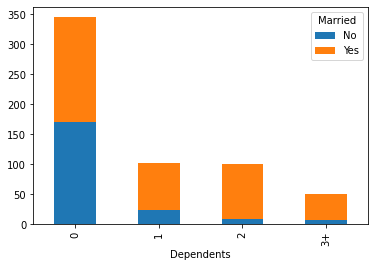

In [230]:
mar_Dep.plot.bar(stacked=True)

In [231]:
edu_Dep = pd.crosstab(train.Dependents,train.Education)

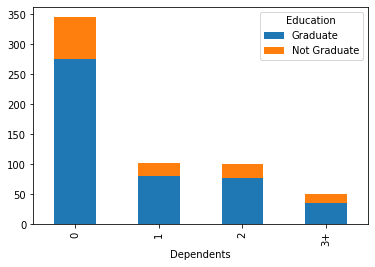

In [232]:
edu_Dep.plot.bar(stacked=True)

In [233]:
SEmp_Dep = pd.crosstab(train.Dependents,train.Self_Employed)

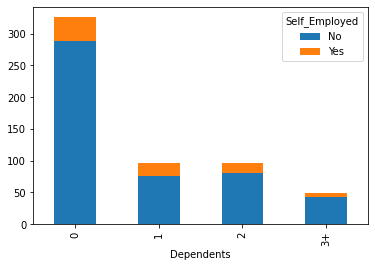

In [234]:
SEmp_Dep.plot.bar(stacked=True)

In [235]:
train['Dependents'].fillna(0,inplace=True)
# test['Dependents'].fillna(0,inplace=True)

In [236]:
SEmp_edu = pd.crosstab(train.Self_Employed,train.Education)

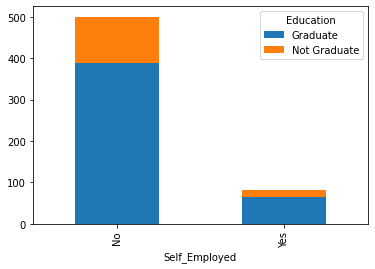

In [237]:
SEmp_edu.plot.bar(stacked=True)

In [238]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [239]:
train['Self_Employed'].fillna('No',inplace=True)
# test['Self_Employed'].fillna('No',inplace=True)

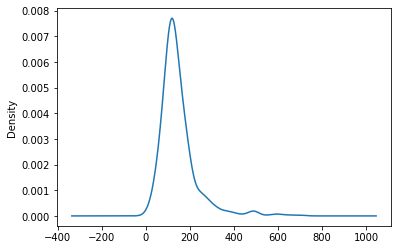

In [240]:
train['LoanAmount'].plot.kde()

In [241]:
train['LoanAmount'].fillna(train.groupby('Dependents')['LoanAmount'].transform('mean'),inplace=True)
# test['LoanAmount'].fillna(test.groupby('Dependents')['LoanAmount'].transform('mean'),inplace=True)

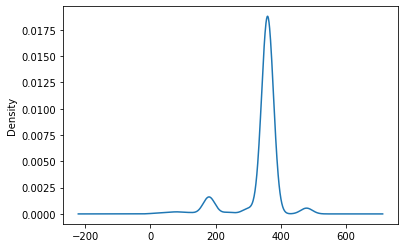

In [242]:
train['Loan_Amount_Term'].plot.kde()

In [243]:
train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [244]:
train.groupby('Dependents')['Loan_Amount_Term'].mean()

Dependents
0     355.714286
0     348.107784
1     329.346535
2     340.871287
3+    325.200000
Name: Loan_Amount_Term, dtype: float64

In [245]:
train['Loan_Amount_Term'].fillna(train.groupby('Dependents')['Loan_Amount_Term'].transform('mean'),inplace=True)
# test['Loan_Amount_Term'].fillna(test.groupby('Dependents')['Loan_Amount_Term'].transform('mean'),inplace=True)

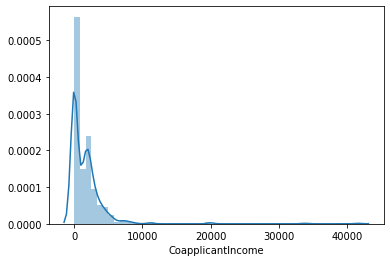

In [246]:
sns.distplot(train['CoapplicantIncome'])

In [247]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [248]:
train['Credit_History'].fillna(1.0, inplace=True)
# test['Credit_History'].fillna(1.0, inplace=True)

In [249]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [250]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           208
Loan_Amount_Term      14
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [251]:
train['Loan_Amount_Term'].value_counts()

360.000000    512
180.000000     44
480.000000     15
300.000000     13
348.107784     11
84.000000       4
240.000000      4
120.000000      3
36.000000       2
60.000000       2
329.346535      1
325.200000      1
355.714286      1
12.000000       1
Name: Loan_Amount_Term, dtype: int64

In [252]:
cat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area']
for i in cat:
    train[i] = train[i].astype('str')
    # test[i] = test[i].astype('str')
    

In [253]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [254]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

train['Debt_Income_Ratio'] = train['Total_Income'] / train['LoanAmount']

In [255]:
X = train.drop(['Loan_ID','Loan_Status','ApplicantIncome','CoapplicantIncome'], axis=1)
y = train['Loan_Status']

# X_test = test.drop(['Loan_ID'], axis=1)

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
X_train.shape, len(y_train)

((491, 11), 491)

In [258]:
X_train_cat = X_train.select_dtypes(exclude=[np.number])
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_cat = X_test.select_dtypes(exclude=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

In [259]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(handle_unknown='ignore')
X_train_oh = oh.fit_transform(X_train_cat).toarray()
X_test_oh = oh.transform(X_test_cat).toarray()

In [260]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_numeric)
X_test_sc = sc.transform(X_test_numeric)

In [261]:
X_train_final = np.hstack((X_train_oh,X_train_sc))
X_test_final = np.hstack((X_test_oh,X_test_sc))

In [262]:
X_train_final = pd.DataFrame(X_train_final)


In [263]:
X_train_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.349208,0.292536,0.167302,-0.544720
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.204260,0.292536,-0.206402,-0.176970
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.711591,0.292536,0.119652,-0.363321
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.239039,0.292536,-0.304046,-0.280774
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.586830,0.292536,-0.470744,-0.236721


In [264]:
X_train_final.shape

(491, 21)

In [189]:
# from imblearn.over_sampling import BorderlineSMOTE

# oversample = BorderlineSMOTE()
# X_train_final, y_train = oversample.fit_resample(X_train_final, y_train)


from imblearn.over_sampling import ADASYN

oversample = ADASYN()
X_train_final, y_train = oversample.fit_resample(X_train_final, y_train)


# from imblearn.over_sampling import SVMSMOTE

# oversample = SVMSMOTE()
# X, y = oversample.fit_resample(X_train_final, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [190]:
X_train_final.shape

(672, 21)

In [265]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_final, y_train)
print('training score',lr.score(X_train_final,y_train))
print('test score',lr.score(X_test_final,y_test))

training score 0.8167006109979633
test score 0.7804878048780488


In [192]:
pred_lr = lr.predict(X_test_final)
pred_lr = pd.Series(pred_lr)
pred_lr

0      Y
1      Y
2      Y
3      N
4      Y
      ..
118    Y
119    N
120    Y
121    Y
122    Y
Length: 123, dtype: object

In [ ]:
submit=test['Loan_ID'].to_frame()
submit['Loan_Status']=pred_lr

In [ ]:
submit.to_csv('submit.csv',index=False)

In [266]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

print('f1 score',f1_score(y_train,lr.predict(X_train_final),average='weighted'))
print(confusion_matrix(y_train,lr.predict(X_train_final)))
print('f1 score',f1_score(y_test,lr.predict(X_test_final),average='weighted'))
print(confusion_matrix(y_test,lr.predict(X_test_final)))

f1 score 0.7944900093576265
[[ 66  83]
 [  7 335]]
f1 score 0.7542126006740163
[[18 25]
 [ 2 78]]


In [267]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_final, y_train)
print('training score',dt.score(X_train_final,y_train))
print('test score',dt.score(X_test_final,y_test))

training score 0.8594704684317719
test score 0.7886178861788617


In [268]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=70,max_depth=3)
rf.fit(X_train_final, y_train)
print('training score',rf.score(X_train_final,y_train))
print('test score',rf.score(X_test_final,y_test))

training score 0.8207739307535642
test score 0.7886178861788617


In [270]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train_final, y_train)
print('training score',knn.score(X_train_final,y_train))
print('test score',knn.score(X_test_final,y_test))

training score 0.7311608961303462
test score 0.7235772357723578


In [273]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_poly = poly.fit_transform(X_train_final)
test_poly = poly.transform(X_test_final)

In [274]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_poly, y_train)
print('training score',lr.score(train_poly,y_train))
print('test score',lr.score(test_poly,y_test))

training score 0.8411405295315683
test score 0.7479674796747967


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [275]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(alpha=1,loss='hinge')
sgd.fit(train_poly, y_train)
print('training score',sgd.score(train_poly,y_train))
print('test score',sgd.score(test_poly,y_test))

training score 0.8004073319755601
test score 0.7804878048780488


In [277]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
rf.fit(train_poly, y_train)
print('training score',rf.score(train_poly,y_train))
print('test score',rf.score(test_poly,y_test))

training score 0.8167006109979633
test score 0.7804878048780488
